# Thesis Appendix A.1 - Ranking Under Lower Uncertainty: Probability in Gen-erating Specific Order Statistic Pairs

This notebook generates the plots featured in the said appendix. See the caption of each plot for more detail.

In [1]:
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.ticker as ticker
import numpy as np
import os
from scipy.stats import rankdata, betabinom
import sys

sys.path.append(os.path.dirname(os.getcwd()))

from rulu.normal_normal_model import (
    _E_F_Zn_ZIr_taylor_second_order, _var_F_Zn_ZIr_taylor_second_order, 
    _E_F_Zn_ZIr_taylor_fourth_order, _var_F_Zn_ZIr_taylor_fourth_order,
    _E_F_Zn_ZIr_taylor_sixth_order, _var_F_Zn_ZIr_taylor_sixth_order,
    _E_F_Zn_ZIr_owen_integrals, _var_F_Zn_ZIr_owen_integrals)
from rulu.utils import fit_beta_distribution_params

------

Some settings used in the appendix:

Some parameter settings used in the appendix:

Small $N$ example 1:
* $N=25$, 
* $\mu_\mathcal{V} = \mu_\epsilon = 0$
* $\sigma^2_\mathcal{V} = 1$
* $\sigma^2_1 = 0.5$
* $\sigma^2_2 = 0.4$
* Number of runs: 500 000

Small $N$ example 2:
* $N=10$
* $\mu_\mathcal{V} = \mu_\epsilon = 0$
* $\sigma^2_\mathcal{V} = 1$
* $\sigma^2_1 = 0.5$
* $\sigma^2_2 = 0.4$
* Number of runs: 500 000

Large $N$ example (taken from DSE paper Section 7.2 / Thesis Section 2.7.2: Case study - Marketing experiments - Scenario 1 (Reducing noise from 5% to 0.8%)):
* $N=184$
* $\mu_\mathcal{V} = 19.9$
* $\mu_\epsilon = 0$
* $\sigma^2_\mathcal{V} = 10^2$
* $\sigma^2_1 = 5^2$
* $\sigma^2_2 = 0.8^2$
* Number of runs: 2 000 000

* (Large $N$ example, large noise example, also example from Case Study - e-Commerce example - scenario 1 (reducing noise from 1% to 0.8%) $N=6700$, $\mu_\mathcal{V} = 0$, $\mu_\epsilon = 0$, $\sigma^2_\mathcal{V} = 0.6^2$, $\sigma^2_1 = 1^2$, $\sigma^2_2 = 0.8^2$, number of runs: 10 000 000

In [2]:
# Ranking under lower uncertainty (normal) model parameters

N = 25
mu_V = 0
mu_epsilon = 0
sigma_sq_V = 1
sigma_sq_1 = 0.5
sigma_sq_2 = 0.4

sigma_V = np.sqrt(sigma_sq_V)
sigma_1 = np.sqrt(sigma_sq_1)
sigma_2 = np.sqrt(sigma_sq_2)

n_runs = 500000

In [3]:
rank_pairs = np.zeros((N, N))

for run in range(0, n_runs):
    V = np.random.default_rng().normal(mu_V, sigma_V, N)
    H = V + np.random.default_rng().normal(mu_epsilon, sigma_1, N)
    L = V + np.random.default_rng().normal(mu_epsilon, sigma_2, N)
    
    ranks_H = rankdata(H)
    ranks_L = rankdata(L)
    
    for i in range(0, N):
        r = ranks_H[i]
        s = ranks_L[i]
        rank_pairs[int(r - 1), int(s - 1)] += 1

/var/folders/bf/0lrr9t1d68j2gkrzm2fgq47r0000gq/T/ipykernel_5256/3496703039.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


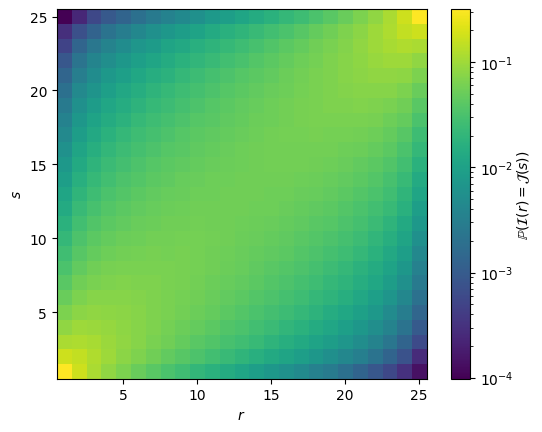

In [4]:
fig, ax = plt.subplots(1)

# Plot the 2-D density
ims = ax.imshow(rank_pairs / n_runs, origin='lower', norm=LogNorm())

# Add the colorbar
cbar = fig.colorbar(ims, ax=ax)
cbar.set_label('$\mathbb{P}(\mathcal{I}(r) = \mathcal{J}(s))$', rotation=90, labelpad=2)

# Make r and s proper index-from-1 ranks by shifting the tick marks
xy_ticks_to_keep = (ax.get_xticks() - 1) > 0
ax.set_xticks((ax.get_xticks() - 1)[xy_ticks_to_keep], 
              ax.get_xticks()[xy_ticks_to_keep].astype(int))
ax.set_yticks((ax.get_yticks() - 1)[xy_ticks_to_keep], 
              ax.get_yticks()[xy_ticks_to_keep].astype(int))

ax.set_xlabel('$r$')
ax.set_ylabel('$s$')
ax.set_xlim(-0.5, N - 0.5)
ax.set_ylim(-0.5, N - 0.5)

fig.show()
# fig.savefig("./output/fig/miscmath_prob_Ir_eq_Js_2d.pdf", 
#             bbox_inches="tight", transparent=True)

/var/folders/bf/0lrr9t1d68j2gkrzm2fgq47r0000gq/T/ipykernel_5256/2126314136.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


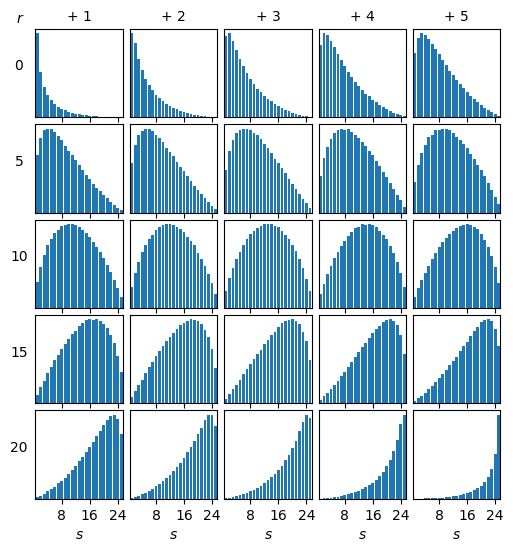

In [5]:
plot_n_cols = 5
fig, ax = plt.subplots(int(np.ceil(N / plot_n_cols)), plot_n_cols, 
                       figsize=(1.2 * plot_n_cols, 1.2 * int(np.ceil(N / plot_n_cols)) + 0.1))

for r in range(0, N):
    curr_ax = ax[r // plot_n_cols, r % plot_n_cols]
    
    curr_ax.bar(np.arange(0, N), rank_pairs[r,:])
    
    # Handle x-axis tick marks and labels
    # Make r and s proper index-from-1 ranks by shifting the tick marks
    curr_ax.xaxis.set_major_locator(ticker.MaxNLocator(4))
    x_ticks_to_keep = (curr_ax.get_xticks() - 1) > 0
    curr_ax.set_xticks((curr_ax.get_xticks() - 1)[x_ticks_to_keep], 
                       curr_ax.get_xticks()[x_ticks_to_keep].astype(int))
    
    # Only the last `plot_n_cols` histogram (i.e. those without another histogram below)
    # Gets the tick labels and axis label
    if (N-r) <= plot_n_cols:
        curr_ax.set_xlabel('$s$')
    else:
        curr_ax.xaxis.set_ticklabels([])
    
    curr_ax.set_yticks([])
    curr_ax.set_xlim(-0.5, N - 0.5)
    
    # Set the labels identifying which plot corresponds to which `r`
    if r == 0:
        curr_ax.text(-N * 0.24, rank_pairs[0,0] * 1.125, "$r$")
    if (r % plot_n_cols) == 0:
        curr_ax.set_ylabel(f"{r}", fontsize='medium', rotation=0, labelpad=12)
    if (r // plot_n_cols) == 0:
        curr_ax.set_title(f"+ {r % plot_n_cols + 1}", fontsize='medium')
    
# Remove everything beyond the last histogram to the end of the row 
for r in range(N, ax.shape[0] * ax.shape[1]):
    curr_ax = ax[r // plot_n_cols, r % plot_n_cols]
    curr_ax.axis('off')

plt.subplots_adjust(wspace=0.08, hspace=0.08)
fig.show()
# fig.savefig("./output/fig/miscmath_prob_Ir_eq_Js_r_marginals.pdf", 
#             bbox_inches="tight", transparent=True)

/var/folders/bf/0lrr9t1d68j2gkrzm2fgq47r0000gq/T/ipykernel_5256/413658535.py:117: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


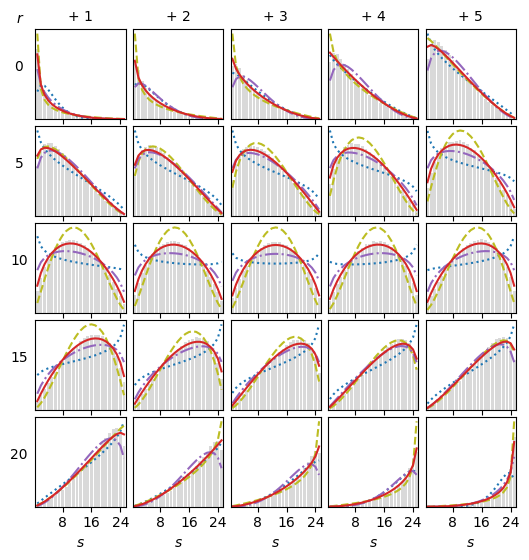

In [6]:
plot_n_cols = 5
fig, ax = plt.subplots(int(np.ceil(N / plot_n_cols)), plot_n_cols, 
                       figsize=(1.2 * plot_n_cols + 0.2, 1.2 * int(np.ceil(N / plot_n_cols)) + 0.2))

for r in range(0, N):
    curr_ax = ax[r // plot_n_cols, r % plot_n_cols]
    
    curr_ax.bar(np.arange(0, N), rank_pairs[r,:], color='black', alpha=0.15)
    
    # Taylor series expansion (2nd order terms)
    alpha_taylor_second_order, beta_taylor_second_order = (
        fit_beta_distribution_params(
            _E_F_Zn_ZIr_taylor_second_order(
                r=r+1, N=N, mu_X=mu_V, mu_eps=mu_epsilon, 
                sigma_sq_X=sigma_sq_V, sigma_sq_1=sigma_sq_1, sigma_sq_2=sigma_sq_2),
            _var_F_Zn_ZIr_taylor_second_order(
                r=r+1, N=N, mu_X=mu_V, mu_eps=mu_epsilon,
                sigma_sq_X=sigma_sq_V, sigma_sq_1=sigma_sq_1, sigma_sq_2=sigma_sq_2)
        )
    )
    curr_ax.plot(
        np.arange(0, N, 1), 
        betabinom.pmf(np.arange(0, N, 1), N-1, 
                      alpha_taylor_second_order, beta_taylor_second_order) * n_runs, 
        ':', c='tab:blue'
    )
    
    # Taylor series expansion (4th order terms)
    alpha_taylor_fourth_order, beta_taylor_fourth_order = (
        fit_beta_distribution_params(
            _E_F_Zn_ZIr_taylor_fourth_order(
                r=r+1, N=N, mu_X=mu_V, mu_eps=mu_epsilon,
                sigma_sq_X=sigma_sq_V, sigma_sq_1=sigma_sq_1, sigma_sq_2=sigma_sq_2),
            _var_F_Zn_ZIr_taylor_fourth_order(
                r=r+1, N=N, mu_X=mu_V, mu_eps=mu_epsilon,
                sigma_sq_X=sigma_sq_V, sigma_sq_1=sigma_sq_1, sigma_sq_2=sigma_sq_2)
        )
    )
    curr_ax.plot(
        np.arange(0, N, 1), 
        betabinom.pmf(np.arange(0, N, 1), N-1, 
                      alpha_taylor_fourth_order, beta_taylor_fourth_order) * n_runs, 
        '--', c='tab:olive'
    )
    
    # Taylor series expansion (6th order terms)
    alpha_taylor_sixth_order, beta_taylor_sixth_order = (
        fit_beta_distribution_params(
            _E_F_Zn_ZIr_taylor_second_order(
                r=r+1, N=N, mu_X=mu_V, mu_eps=mu_epsilon,
                sigma_sq_X=sigma_sq_V, sigma_sq_1=sigma_sq_1, sigma_sq_2=sigma_sq_2),
            _var_F_Zn_ZIr_taylor_sixth_order(
                r=r+1, N=N, mu_X=mu_V, mu_eps=mu_epsilon,
                sigma_sq_X=sigma_sq_V, sigma_sq_1=sigma_sq_1, sigma_sq_2=sigma_sq_2)
        )
    )
    curr_ax.plot(
        np.arange(0, N, 1), 
        betabinom.pmf(np.arange(0, N, 1), N-1, 
                      alpha_taylor_sixth_order, beta_taylor_sixth_order) * n_runs, 
        '-.', c='tab:purple'
    )
    
    # Using Owen's integrals of Gaussian functions
    alpha_owen_integrals, beta_owen_integrals = fit_beta_distribution_params(
        _E_F_Zn_ZIr_owen_integrals(
            r=r+1, sigma_sq_X=sigma_sq_V, sigma_sq_1=sigma_sq_1, sigma_sq_2=sigma_sq_2, N=N),
        _var_F_Zn_ZIr_owen_integrals(
            r=r+1, sigma_sq_X=sigma_sq_V, sigma_sq_1=sigma_sq_1, sigma_sq_2=sigma_sq_2, N=N)
    )
    curr_ax.plot(
        np.arange(0, N, 1), 
        betabinom.pmf(np.arange(0, N, 1), N-1, alpha_owen_integrals, beta_owen_integrals) * n_runs, 
        '-', c='tab:red'
    )
    
    # Handle x-axis tick marks and labels
    # Make r and s proper index-from-1 ranks by shifting the tick marks
    curr_ax.xaxis.set_major_locator(ticker.MaxNLocator(4))
    x_ticks_to_keep = (curr_ax.get_xticks() - 1) > 0
    curr_ax.set_xticks((curr_ax.get_xticks() - 1)[x_ticks_to_keep], 
                       curr_ax.get_xticks()[x_ticks_to_keep].astype(int))
    
    # Only the last `plot_n_cols` histogram (i.e. those without another histogram below)
    # Gets the tick labels and axis label
    if (N-r) <= plot_n_cols:
        curr_ax.set_xlabel('$s$')
    else:
        curr_ax.xaxis.set_ticklabels([])
    
    curr_ax.set_yticks([])
    curr_ax.set_xlim(-0.5, N - 0.5)
    
    # Set the labels identifying which plot corresponds to which `r`
    if r == 0:
        max_y = (
            np.max([
                rank_pairs[0,0],
                betabinom.pmf(0, N-1, alpha_taylor_second_order, beta_taylor_second_order) * n_runs,
                betabinom.pmf(0, N-1, alpha_taylor_fourth_order, beta_taylor_fourth_order) * n_runs,
                betabinom.pmf(0, N-1, alpha_taylor_sixth_order, beta_taylor_sixth_order) * n_runs,
                betabinom.pmf(0, N-1, alpha_owen_integrals, beta_owen_integrals) * n_runs,
            ])
        )
        curr_ax.text(-N * 0.24, max_y * 1.125, "$r$")
    if (r % plot_n_cols) == 0:
        curr_ax.set_ylabel(f"{r}", fontsize='medium', rotation=0, labelpad=12)
    if (r // plot_n_cols) == 0:
        curr_ax.set_title(f"+ {r % plot_n_cols + 1}", fontsize='medium')
    
# Remove everything beyond the last histogram to the end of the row 
for r in range(N, ax.shape[0] * ax.shape[1]):
    curr_ax = ax[r // plot_n_cols, r % plot_n_cols]
    curr_ax.axis('off')

plt.subplots_adjust(wspace=0.08, hspace=0.08)
fig.show()
# fig.savefig("./output/fig/miscmath_prob_Ir_eq_Js_r_marginals_w_fits_N10.pdf", 
#             bbox_inches="tight", transparent=True)